# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame. Inner join since we only want data on mice that have results. 
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].value_counts())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = mouse_study_df.copy()
duplicate_status = duplicates_df[["Mouse ID", "Timepoint"]].duplicated()
duplicates_df["Duplicate?"] = duplicate_status
duplicates_df = duplicates_df.loc[duplicates_df["Duplicate?"]==True]
duplicates_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = clean_mouse_study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = clean_mouse_study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = clean_mouse_study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev_tumor = clean_mouse_study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = clean_mouse_study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor,
                          "Tumor Volme Variance": var_tumor, "Tumor Volume Std. Dev.": stdev_tumor,
                          "Tumor Volume Std. Err.": sem_tumor})
summary_df

C:\Users\jkaum\AppData\Local\Temp\ipykernel_10252\3722631080.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor = clean_mouse_study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\jkaum\AppData\Local\Temp\ipykernel_10252\3722631080.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor = clean_mouse_study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\jkaum\AppData\Local\Temp\ipykernel_10252\3722631080.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to

,Mean Tumor Volume,Median Tumor Volume,Tumor Volme Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_mouse_study_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

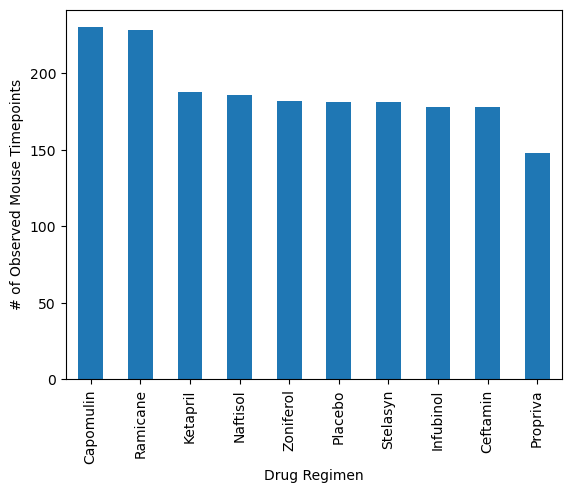

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_per_drug = clean_mouse_study_df["Drug Regimen"].value_counts()
timepoints_per_drug.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()

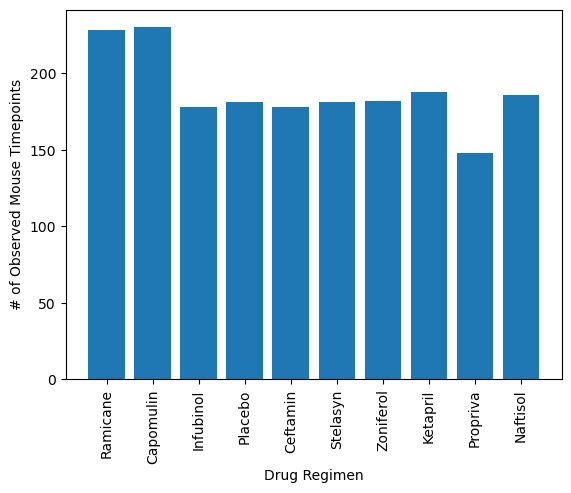

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_name = clean_mouse_study_df["Drug Regimen"].unique()
timepoints = [clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"] == drug].count()["Timepoint"] for drug in drug_name]
plt.bar(drug_name, timepoints)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

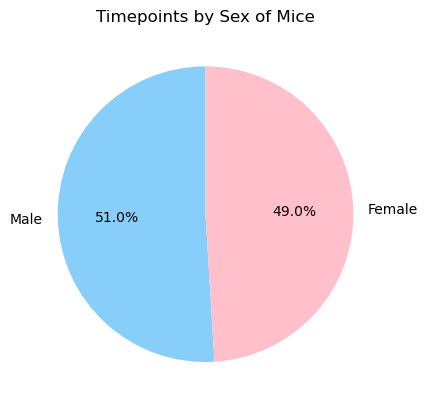

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_mouse_study_df["Sex"].value_counts()
mouse_gender.plot(kind="pie", ylabel="", title="Timepoints by Sex of Mice",colors=["lightskyblue", "pink"],
                  startangle = 90, autopct="%1.1f%%")
plt.show()

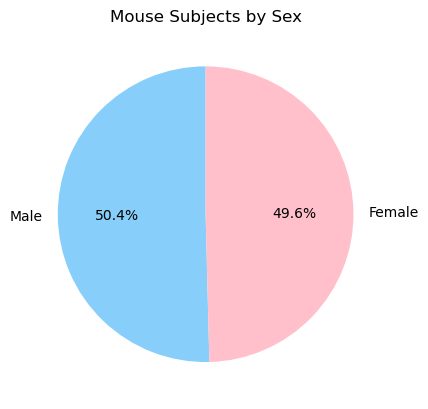

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
individual_mice = clean_mouse_study_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()
slice_colors = ["lightskyblue", "pink"]
plt.pie(individual_mice.values, labels = individual_mice.index, colors = slice_colors, startangle = 90, autopct="%1.1f%%")
plt.title("Mouse Subjects by Sex")
plt.show()

In [16]:
individual_mice.values

array([125, 123], dtype=int64)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
individual_mice = clean_mouse_study_df.drop_duplicates(subset="Mouse ID")
male_mice = len(individual_mice[individual_mice["Sex"] == "Male"].value_counts())
female_mice = len(individual_mice[individual_mice["Sex"] == "Female"].value_counts())
total_mice = len(individual_mice)
slice_labels = ["Male", "Female"]
slice_size = [male_mice, female_mice]
slice_colors = ["lightskyblue", "pink"]
plt.pie(slice_size, labels = slice_labels, colors = slice_colors, startangle = 90, autopct="%1.1f%%")
plt.title("Sex of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_final_time = pd.DataFrame(clean_mouse_study_df.groupby(['Mouse ID']).max()['Timepoint'])
mouse_final_time = mouse_final_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_final_tumor = pd.merge(mouse_final_time, clean_mouse_study_df, on = ["Mouse ID", "Timepoint"])
mouse_final_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty dictionary to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    drug_tumor_vol = mouse_final_tumor.loc[mouse_final_tumor['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # Update dictionary 
    tumor_vol[drug] = drug_tumor_vol
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_tumor_vol.loc[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

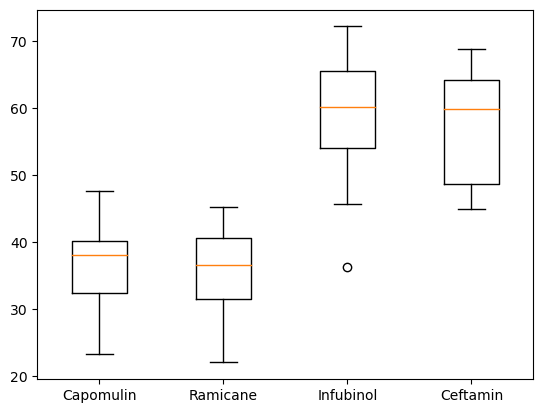

In [33]:
tumor_vol.values()
plt.boxplot(tumor_vol.values(), labels=tumor_vol.keys())
plt.show

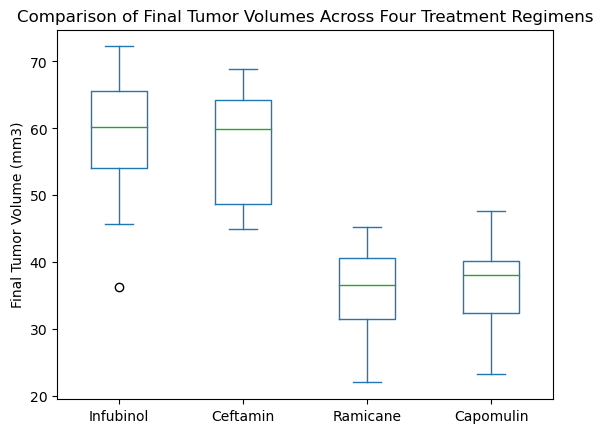

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol = pd.DataFrame(tumor_vol)
box_plot = tumor_vol[["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]].plot(kind="box")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Comparison of Final Tumor Volumes Across Four Treatment Regimens")
plt.show()

## Line and Scatter Plots

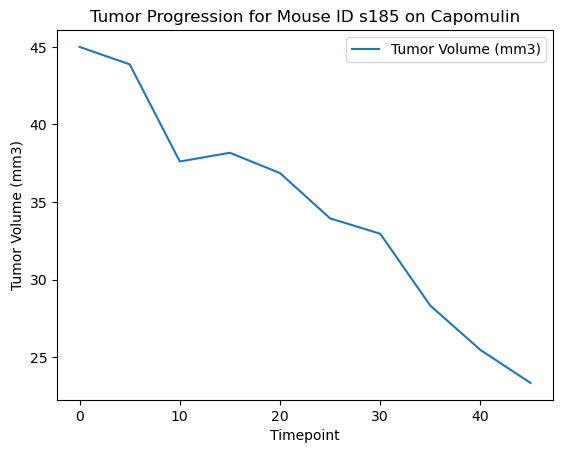

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mice = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == "Capomulin"]

#I've looked at the cap_mice dataframe and selected Mouse ID s185 to create the line plot
cap_mouse = "s185"
cap_mouse_data = cap_mice.loc[cap_mice['Mouse ID'] == cap_mouse]
cap_mouse_data.plot(kind='line', x="Timepoint", y="Tumor Volume (mm3)", ylabel="Tumor Volume (mm3)",
                title=f"Tumor Progression for Mouse ID {cap_mouse} on Capomulin")
plt.show()

C:\Users\jkaum\AppData\Local\Temp\ipykernel_10252\3389441448.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wt_v_tumor_cap_mice = cap_mice.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]


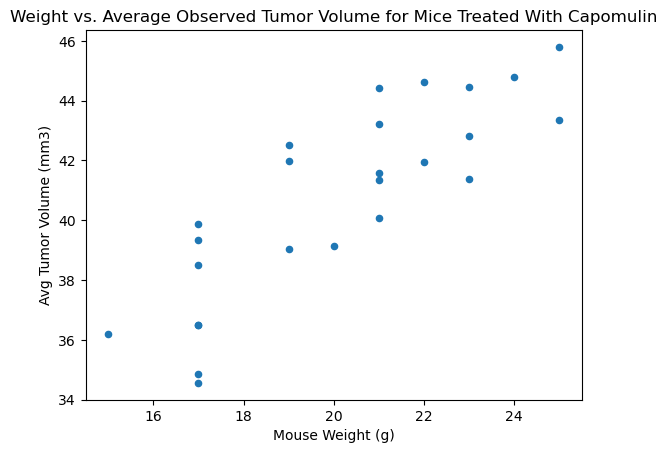

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
wt_v_tumor_cap_mice = cap_mice.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]
wt_v_tumor_cap_mice.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)",
                         title="Weight vs. Average Observed Tumor Volume for Mice Treated With Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


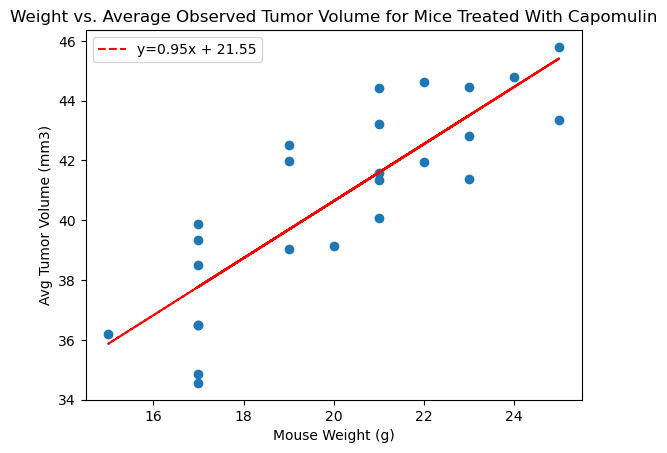

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_weight = wt_v_tumor_cap_mice['Weight (g)']
cap_tumor = wt_v_tumor_cap_mice['Tumor Volume (mm3)']
cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(cap_weight, cap_tumor)
cap_fit = cap_slope * cap_weight + cap_int
print(f"The correlation between mouse weight and average tumor volume is {round(cap_r,2)}")

# Regenerating the scatterplot to include the linear fit line
plt.scatter(cap_weight, cap_tumor)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Weight vs. Average Observed Tumor Volume for Mice Treated With Capomulin")
plt.plot(cap_weight, cap_fit, "r--", label=f"y={round(cap_slope,2)}x + {round(cap_int,2)}")
plt.legend()
# plt.text(20,40,f"y={round(cap_slope,2)}x + {round(cap_int,2)}", color="green")
plt.show()